In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import threading
import pickle
import joblib
import copy
import threading
from sklearn import preprocessing, model_selection, base, metrics, linear_model, pipeline, ensemble, svm, multiclass, neighbors, datasets, impute, compose
from scipy import ndimage, spatial, stats
import seaborn as sns
from tensorflow import keras
import tensorflow as tf

2024-07-09 07:38:31.856960: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-09 07:38:32.123096: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 07:38:32.759831: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
housing = pd.read_csv('data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing['ocean_proximity'].value_counts(dropna=False)

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
X, y = housing.drop('median_house_value', axis=1), housing['median_house_value']

In [12]:
X_sub = X['housing_median_age']

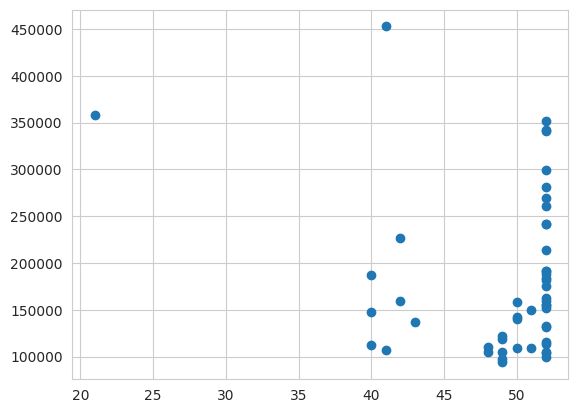

In [13]:
plt.scatter(X_sub[:50], y[:50])

In [19]:
lr = linear_model.LinearRegression()
lr.fit((X_sub.values).reshape(-1,1), y)

LinearRegression()

In [21]:
lr.score(X_sub.values.reshape(-1,1), y)

0.011156305266710853

In [22]:
X_sub = X_sub.values.reshape(-1,1)

In [23]:
poly = preprocessing.PolynomialFeatures(degree=2)
X_sub_new = poly.fit_transform(X_sub)

In [24]:
lr2 = linear_model.LinearRegression()
lr2.fit(X_sub_new, y)

LinearRegression()

In [6]:
a, b = tf.unique(tf.constant(['a', 'b', 'c', 'a']))
a, b

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'a', b'b', b'c'], dtype=object)>,
 <tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 2, 0], dtype=int32)>)

In [7]:
tf.one_hot(b, len(a))

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)>

In [13]:
vocab = ['a', 'b', 'c', 'd']
indices = tf.range(len(vocab), dtype=tf.int64)

init_table = tf.lookup.KeyValueTensorInitializer(vocab, indices)
lookup_table = tf.lookup.StaticVocabularyTable(init_table, num_oov_buckets=2)

In [16]:
tf.one_hot(lookup_table.lookup(tf.constant(['a', 'b', 'b', 'a', 'e'])), depth=len(vocab)+2)

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [21]:
embedding = tf.random.uniform((6, 2)) #discouraged

cats = lookup_table.lookup(tf.constant(['a', 'b', 'b', 'a', 'e']))
tf.nn.embedding_lookup(embedding, cats)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[0.33301806, 0.3807509 ],
       [0.5610728 , 0.71595013],
       [0.5610728 , 0.71595013],
       [0.33301806, 0.3807509 ],
       [0.76269495, 0.02607489]], dtype=float32)>

In [22]:
embedding

<tf.Tensor: shape=(6, 2), dtype=float32, numpy=
array([[0.33301806, 0.3807509 ],
       [0.5610728 , 0.71595013],
       [0.63383067, 0.26450765],
       [0.59786415, 0.5320476 ],
       [0.22355258, 0.9348483 ],
       [0.76269495, 0.02607489]], dtype=float32)>

In [41]:
a = keras.layers.TextVectorization()
a.adapt(['hello', 'world'])
a(['hello', 'nigga'])

<tf.Tensor: shape=(2, 1), dtype=int64, numpy=
array([[3],
       [1]])>